# Data Exploration Template

This notebook provides a template for exploring new datasets.

**Dataset:** [Replace with your dataset name]
**Date:** [Replace with current date]
**Author:** [Your name]

## 1. Import Libraries

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plotting
%matplotlib inline
plt.style.use('default')
sns.set_palette("husl")

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load Data

In [2]:
# Load your dataset here
# Example: df = pd.read_csv('../data/raw/your_dataset.csv')

# For demonstration, let's create a sample dataset
np.random.seed(42)
n_samples = 1000

df = pd.DataFrame({
    'id': range(1, n_samples + 1),
    'age': np.random.randint(18, 65, n_samples),
    'income': np.random.normal(50000, 15000, n_samples),
    'score': np.random.uniform(0, 100, n_samples),
    'category': np.random.choice(['A', 'B', 'C', 'D'], n_samples),
    'is_active': np.random.choice([True, False], n_samples, p=[0.7, 0.3])
})

# Introduce some missing values
missing_indices = np.random.choice(df.index, size=int(0.05 * n_samples), replace=False)
df.loc[missing_indices, 'income'] = np.nan

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")

Dataset loaded successfully!
Shape: (1000, 6)


## 3. Initial Data Exploration

In [3]:
# Basic information about the dataset
print("=== DATASET OVERVIEW ===")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\n=== DATA TYPES ===")
print(df.dtypes)
print("\n=== MEMORY USAGE ===")
print(df.memory_usage(deep=True))

=== DATASET OVERVIEW ===
Shape: (1000, 6)
Columns: ['id', 'age', 'income', 'score', 'category', 'is_active']

=== DATA TYPES ===
id             int64
age            int32
income       float64
score        float64
category      object
is_active       bool
dtype: object

=== MEMORY USAGE ===
Index          132
id            8000
age           4000
income        8000
score         8000
category     50000
is_active     1000
dtype: int64


In [4]:
# First few rows
print("=== FIRST 5 ROWS ===")
display(df.head())

print("\n=== LAST 5 ROWS ===")
display(df.tail())

=== FIRST 5 ROWS ===


,id,age,income,score,category,is_active
0,1,56,65094.392138,45.818689,C,True
1,2,46,41346.621957,48.296887,A,False
2,3,32,62535.381681,13.347997,C,True
3,4,60,33054.397180,8.060151,B,True
4,5,25,NaN,72.793931,A,True



=== LAST 5 ROWS ===


,id,age,income,score,category,is_active
995,996,22,47785.961206,1.141798,A,True
996,997,40,43009.452472,70.369978,A,True
997,998,27,26079.453991,97.025711,B,True
998,999,61,57704.001599,43.766133,A,True
999,1000,19,42009.487405,23.497340,A,True


In [5]:
# Statistical summary
print("=== STATISTICAL SUMMARY ===")
display(df.describe(include='all'))

=== STATISTICAL SUMMARY ===


,id,age,income,score,category,is_active
count,1000.000000,1000.000000,950.000000,1000.000000,1000,1000
unique,NaN,NaN,NaN,NaN,4,2
top,NaN,NaN,NaN,NaN,C,True
freq,NaN,NaN,NaN,NaN,260,732
mean,500.500000,40.986000,51311.910996,50.066779,NaN,NaN
std,288.819436,13.497852,14806.886356,29.055327,NaN,NaN
min,1.000000,18.000000,6556.169327,0.001163,NaN,NaN
25%,250.750000,29.000000,41536.919650,26.009459,NaN,NaN
50%,500.500000,42.000000,51146.204619,49.767618,NaN,NaN
75%,750.250000,52.000000,60632.628950,75.634809,NaN,NaN


## 4. Data Quality Assessment

In [6]:
# Missing values analysis
print("=== MISSING VALUES ===")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) > 0:
    display(missing_df)
else:
    print("No missing values found!")

=== MISSING VALUES ===


,Missing Count,Missing Percentage
income,50,5.0


In [7]:
# Duplicate rows
duplicates = df.duplicated().sum()
print(f"=== DUPLICATE ROWS ===")
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    print("\nDuplicate rows:")
    display(df[df.duplicated()])

=== DUPLICATE ROWS ===
Number of duplicate rows: 0


In [8]:
# Data types and unique values
print("=== UNIQUE VALUES PER COLUMN ===")
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count} unique values")
    
    # Show unique values for categorical columns
    if df[col].dtype == 'object' or unique_count < 10:
        print(f"  Values: {sorted(df[col].unique())}")
    print()

=== UNIQUE VALUES PER COLUMN ===
id: 1000 unique values

age: 47 unique values

income: 950 unique values

score: 1000 unique values

category: 4 unique values
  Values: ['A', 'B', 'C', 'D']

is_active: 2 unique values
  Values: [np.False_, np.True_]



## 5. Data Visualization

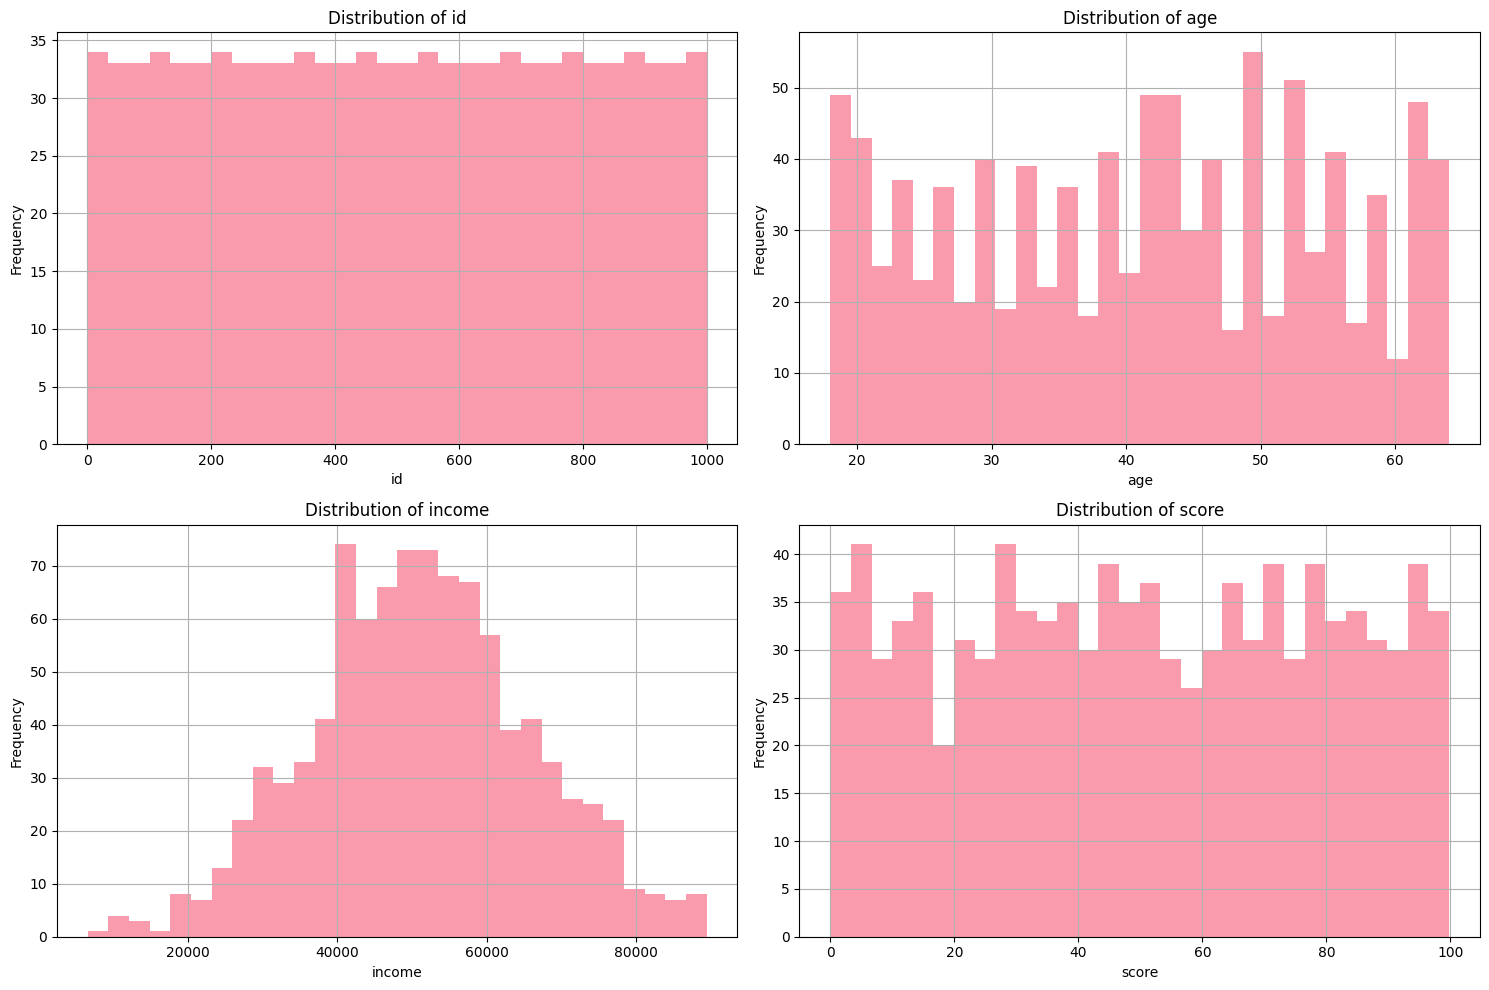

In [9]:
# Distribution of numerical variables
numerical_cols = df.select_dtypes(include=[np.number]).columns

if len(numerical_cols) > 0:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.ravel()
    
    for i, col in enumerate(numerical_cols[:4]):
        if i < len(axes):
            df[col].hist(bins=30, ax=axes[i], alpha=0.7)
            axes[i].set_title(f'Distribution of {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Frequency')
    
    # Hide empty subplots
    for j in range(len(numerical_cols), len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()
else:
    print("No numerical columns found for distribution plots.")

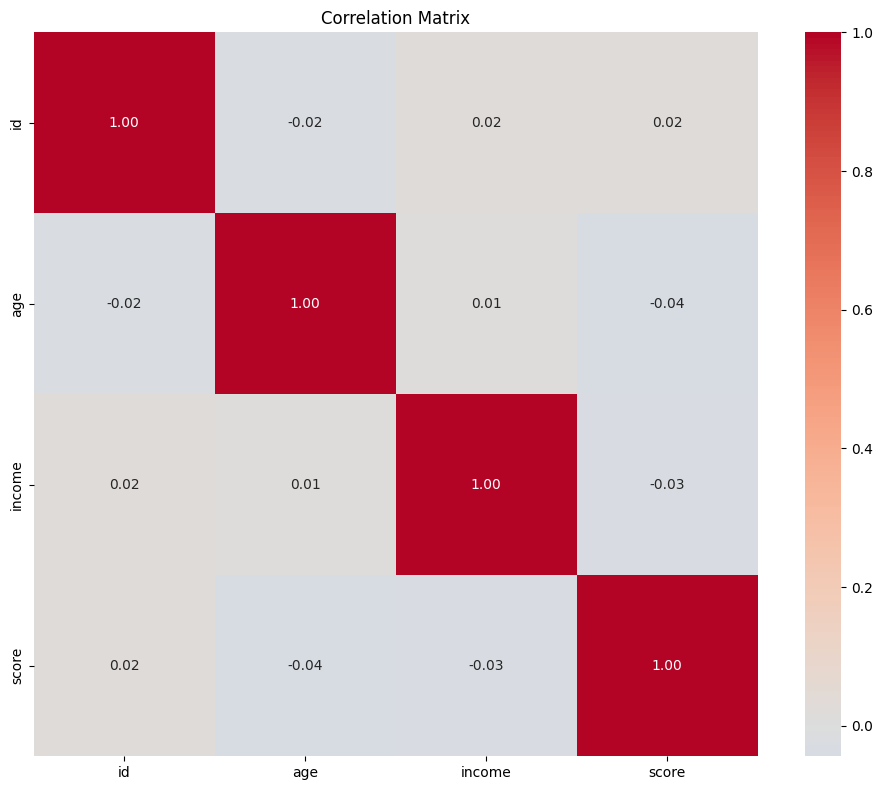

In [10]:
# Correlation matrix for numerical variables
if len(numerical_cols) > 1:
    plt.figure(figsize=(10, 8))
    correlation_matrix = df[numerical_cols].corr()
    
    sns.heatmap(correlation_matrix, 
                annot=True, 
                cmap='coolwarm', 
                center=0,
                square=True,
                fmt='.2f')
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()
else:
    print("Need at least 2 numerical columns for correlation analysis.")

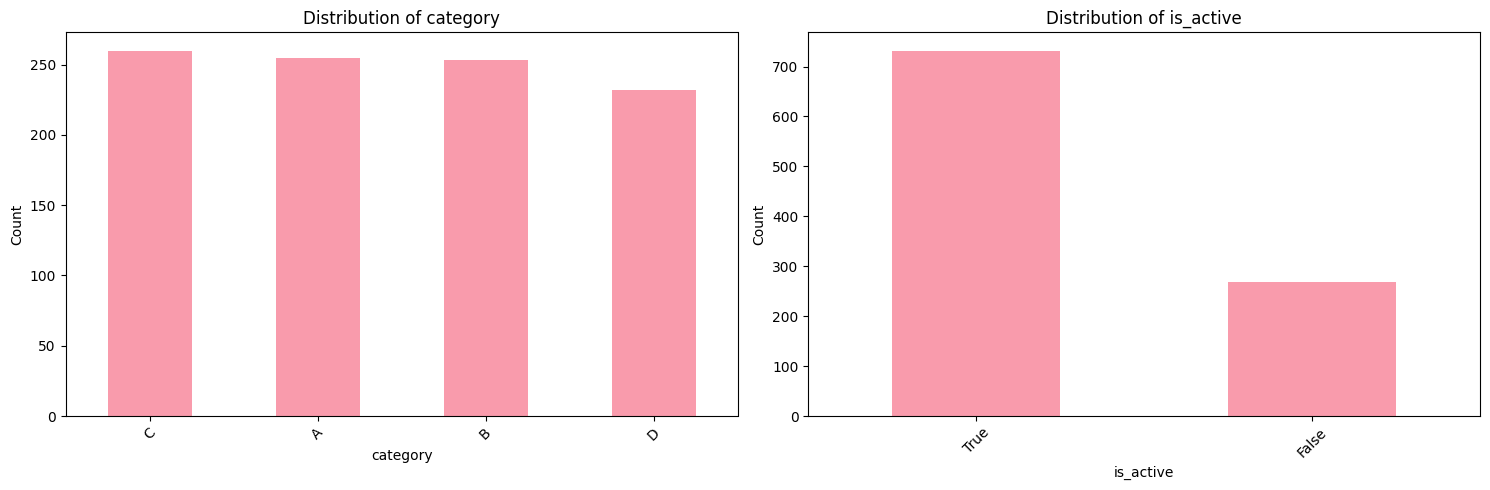

In [11]:
# Categorical variables visualization
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns

if len(categorical_cols) > 0:
    fig, axes = plt.subplots(1, min(len(categorical_cols), 3), figsize=(15, 5))
    if len(categorical_cols) == 1:
        axes = [axes]
    
    for i, col in enumerate(categorical_cols[:3]):
        if i < len(axes):
            value_counts = df[col].value_counts()
            value_counts.plot(kind='bar', ax=axes[i], alpha=0.7)
            axes[i].set_title(f'Distribution of {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Count')
            axes[i].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
else:
    print("No categorical columns found for visualization.")

## 6. Outlier Detection

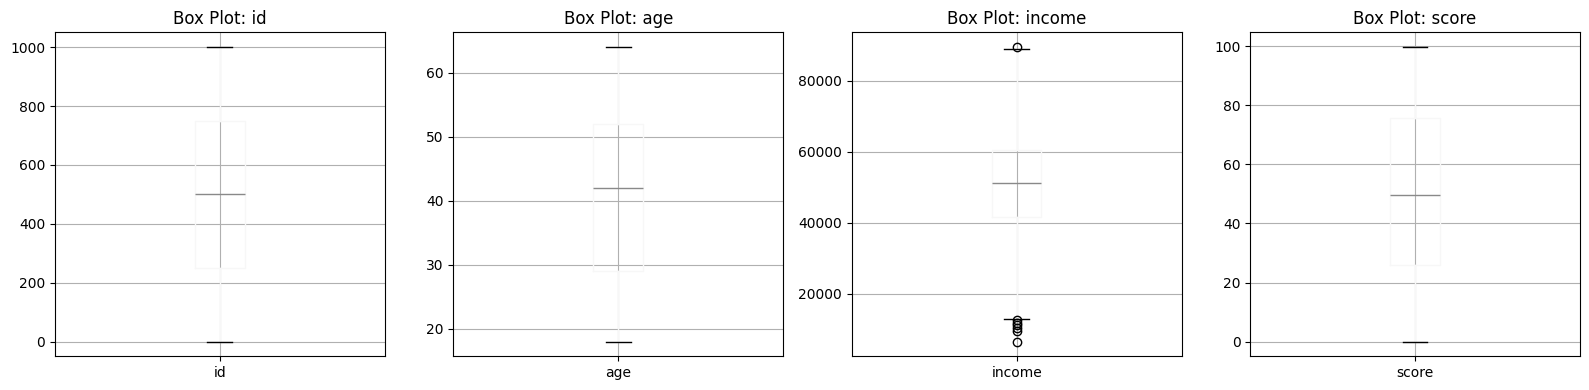

=== OUTLIER DETECTION (IQR Method) ===
id: 0 outliers (0.00%)

age: 0 outliers (0.00%)

income: 7 outliers (0.70%)
  Range: [12893.36, 89276.19]
  Outlier values: [np.float64(6556.1693270946635), np.float64(9546.700355876426), np.float64(10235.45287410482), np.float64(11134.365617826348), np.float64(11691.182976470678), np.float64(12508.914276896401), np.float64(89485.73097256086)]

score: 0 outliers (0.00%)



In [12]:
# Box plots for outlier detection
if len(numerical_cols) > 0:
    fig, axes = plt.subplots(1, min(len(numerical_cols), 4), figsize=(16, 4))
    if len(numerical_cols) == 1:
        axes = [axes]
    
    for i, col in enumerate(numerical_cols[:4]):
        if i < len(axes):
            df.boxplot(column=col, ax=axes[i])
            axes[i].set_title(f'Box Plot: {col}')
    
    plt.tight_layout()
    plt.show()
    
    # Statistical outlier detection using IQR
    print("=== OUTLIER DETECTION (IQR Method) ===")
    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_count = len(outliers)
        outlier_percentage = (outlier_count / len(df)) * 100
        
        print(f"{col}: {outlier_count} outliers ({outlier_percentage:.2f}%)")
        if outlier_count > 0:
            print(f"  Range: [{lower_bound:.2f}, {upper_bound:.2f}]")
            print(f"  Outlier values: {sorted(outliers[col].values)[:10]}..." if outlier_count > 10 else f"  Outlier values: {sorted(outliers[col].values)}")
        print()
else:
    print("No numerical columns found for outlier detection.")

## 7. Summary and Next Steps

In [13]:
print("=== DATASET SUMMARY ===")
print(f"Dataset shape: {df.shape}")
print(f"Numerical columns: {len(numerical_cols)}")
print(f"Categorical columns: {len(categorical_cols)}")
print(f"Missing values: {df.isnull().sum().sum()}")
print(f"Duplicate rows: {df.duplicated().sum()}")

print("\n=== NEXT STEPS ===")
print("1. Handle missing values if any")
print("2. Remove or investigate outliers")
print("3. Feature engineering if needed")
print("4. Prepare data for modeling")
print("5. Save cleaned data to '../data/processed/'")

print("\n=== RECOMMENDED ACTIONS ===")
if df.isnull().sum().sum() > 0:
    print("• Address missing values")
if df.duplicated().sum() > 0:
    print("• Remove duplicate rows")
if len(numerical_cols) > 0:
    print("• Consider scaling numerical features")
if len(categorical_cols) > 0:
    print("• Encode categorical variables if needed")

print("\nExploration complete! 🎉")

=== DATASET SUMMARY ===
Dataset shape: (1000, 6)
Numerical columns: 4
Categorical columns: 2
Missing values: 50
Duplicate rows: 0

=== NEXT STEPS ===
1. Handle missing values if any
2. Remove or investigate outliers
3. Feature engineering if needed
4. Prepare data for modeling
5. Save cleaned data to '../data/processed/'

=== RECOMMENDED ACTIONS ===
• Address missing values
• Consider scaling numerical features
• Encode categorical variables if needed

Exploration complete! 🎉


## 8. Save Processed Data (Optional)

In [14]:
# Uncomment the lines below to save your processed data

# # Create a copy for processing
# df_processed = df.copy()

# # Apply any cleaning steps here
# # Example: df_processed = df_processed.dropna()
# # Example: df_processed = df_processed.drop_duplicates()

# # Save to processed data folder
# import os
# os.makedirs('../data/processed', exist_ok=True)
# df_processed.to_csv('../data/processed/cleaned_dataset.csv', index=False)
# print("Processed data saved to '../data/processed/cleaned_dataset.csv'")

print("Data processing template ready for your customization!")

Data processing template ready for your customization!
